# The SparksFoundation- GRIP internship 

# By Paresh Meher

# Task 02 : #2 Exploratory Data Analysis Sports

# Objective :

* As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
matches = pd.read_csv("Indian Premier League/matches.csv")
deliveries = pd.read_csv("Indian Premier League/deliveries.csv")

In [5]:
print('Deliveries:',deliveries.shape)
print('Matches:   ',matches.shape)

Deliveries: (179078, 21)
Matches:    (756, 18)


In [6]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# checking null values

In [8]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
matches[matches.city.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


 * For all the cities with NULL values, VENUE is Dubai International Cricket Stadium, so city will be DUBAI

In [10]:
matches.city.fillna('Dubai',inplace=True)

 * There are 4 matches with winner as NA. May be the match is incomplete due to some reasons. So, winner we will can update with "Match Abandoned".

In [11]:
matches.winner.fillna('Match Abandoned',inplace=True)
matches.player_of_match.fillna('Match Abandoned',inplace=True)
matches.umpire1.fillna('No_Info',inplace=True)
matches.umpire2.fillna('No_Info',inplace=True)

In [12]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN

In [13]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [14]:
deliveries.fillna(0,inplace=True)

# We can analyse the data further in 3 different ways
# # 1 Match Analysis
    1.1 Matches per Season 
    1.2 Most Player of the Match awards
    1.3 Most Wins by Team and Percentage
    1.4 Most hosted Venues
    1.5 Toss winning and winning chances


## 2 Runs Analysis
    2.1 Analysis of 
           * Wides , Byeruns
           * legbyes , noball
           * extra runs , Dismissed 
           * runs made by batting and bowling teams 
    2.2 Most Runs by batsman in IPL , Orange Cap 
    2.3 Most Sixes by batsman in IPL
    2.4 Most Fours by batsman in IPL
    2.4 Most Runouts by batsman in IPL


## 3 Wickets Analysis
    3.1 Top Wicket takers in IPL , Purple cap
    3.2 Most catches across IPL
    3.3 Most Runouts by fielder

## Preliminary Assesment

In [15]:
print('Total IPL-Seasons played: ',matches.season.nunique())
print('List of Teams played in IPL :\n  ',np.unique(matches[['team1','team2']].values))

Total IPL-Seasons played:  12
List of Teams played in IPL :
   ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


Pune IPL team changed their name from Rising Pune Supergiants to Rising Pune Supergiant in Season 2017.

In [16]:
matches['winner'][matches['winner'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'
matches['team1'][matches['team1'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'
matches['team2'][matches['team2'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'
matches['toss_winner'][matches['toss_winner'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'

In [17]:
print('Total number of Matches played :',len(deliveries['match_id'].unique()))
print('Total number of RUNS SCORED by the batsman :',deliveries.total_runs.sum())
print('Total number of WIDE RUNS :',deliveries.wide_runs.sum())
print('Total number of NO-BALL RUNS :',deliveries.noball_runs.sum())
print('Total number of BATSMAN RUNS :',deliveries.batsman_runs.sum())
print('Total number of SUPER OVERS :',deliveries[deliveries.is_super_over==1].match_id.nunique())

Total number of Matches played : 756
Total number of RUNS SCORED by the batsman : 235290
Total number of WIDE RUNS : 6576
Total number of NO-BALL RUNS : 749
Total number of BATSMAN RUNS : 223286
Total number of SUPER OVERS : 7


## Correlation

<AxesSubplot:>

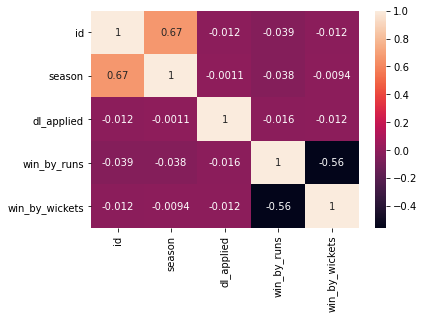

In [18]:
figure_1=matches.corr()
sns.heatmap(figure_1,annot=True)

# 1 Match Analysis
## Number of Matches played in each IPL season¶


In [19]:
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

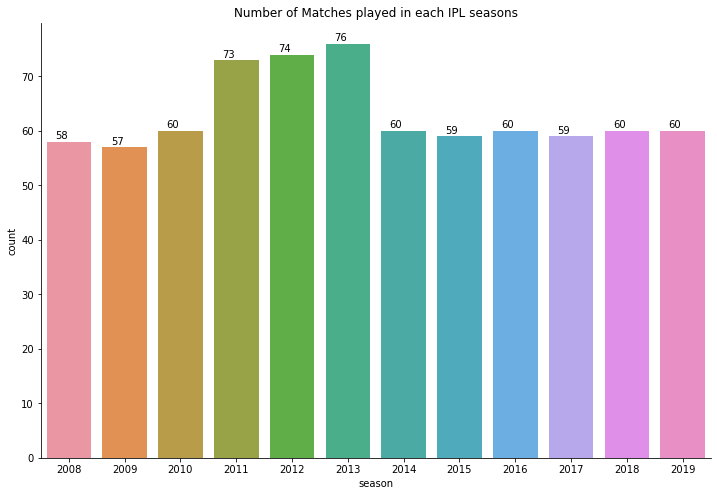

In [20]:
plt.figure(figsize=(12,8))
plt.title('Number of Matches played in each IPL seasons')
ax=sns.countplot(x=matches.season,)
annot_plot(ax,0.15,0.5)
plt.show()

* In 2013 maximum of 76 matches are played followed by 2012, 2011
* Usually number of matches are around 60

# Top 10 MAN OF THE MATCH

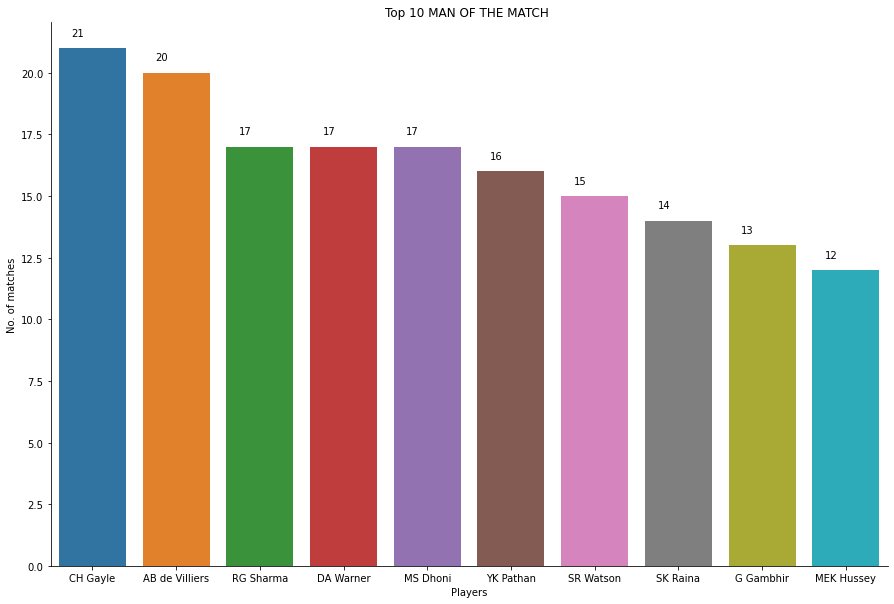

In [21]:
plt.figure(figsize=(15,10))
plt.title('Top 10 MAN OF THE MATCH ')
ax=sns.countplot(x=matches.player_of_match,order = matches.player_of_match.value_counts()[:10].index,)
ax.set_ylabel('No. of matches')
ax.set_xlabel('Players')
annot_plot(ax,0.15,0.5)
plt.show()

* Chris Gayle is leading the pack followed by AB de Villiers

# Number of Matches won by Each IPL Team

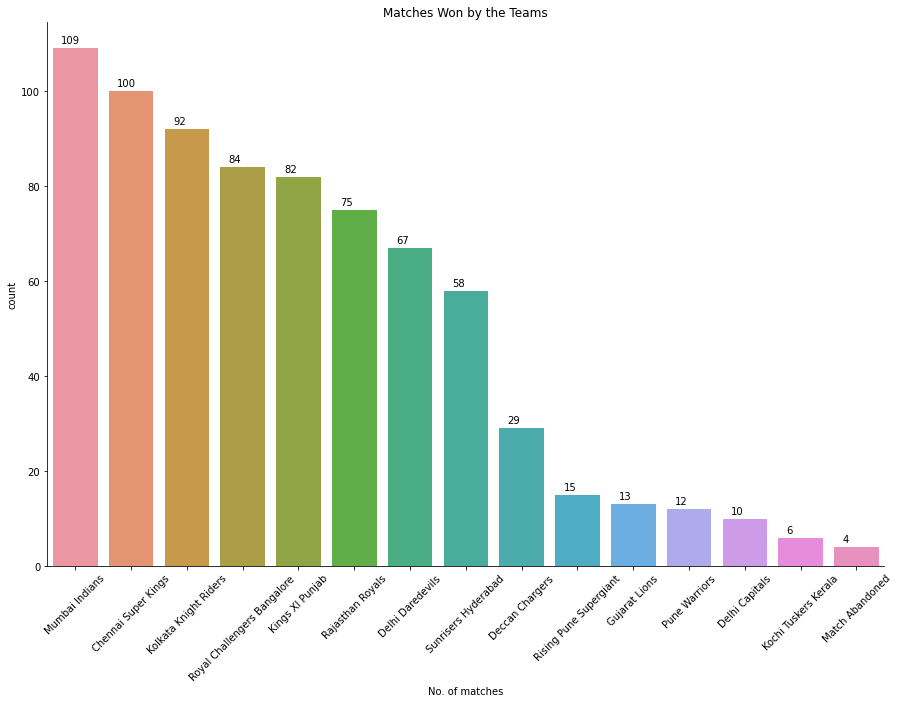

In [22]:
plt.figure(figsize=(15,10))
plt.title('Matches Won by the Teams')
ax=sns.countplot(x=matches['winner'], order = matches['winner'].value_counts().index)
ax.set_xlabel('No. of matches')
plt.xticks(rotation=45)
annot_plot(ax,0.15,1)
plt.show()

* Mumbai Indians are the winners of most matches followed by Chennai super kings

# Total matches Vs Matches Won & Percentage of Matches Won

In [23]:
total_matches= pd.concat([matches.team1,matches.team2])
total_matches = total_matches.value_counts().reset_index()
total_matches.columns = ['Team','Total_Matches']
won_team = matches.winner.value_counts().reset_index()
won_team.columns = ['Team','Matches_won']
win_data= won_team[['Team','Matches_won']].merge(total_matches, left_on = 'Team', right_on = 'Team', how = 'right')
win_data['win_percent'] =  round((win_data.Matches_won/win_data['Total_Matches'])*100,1)

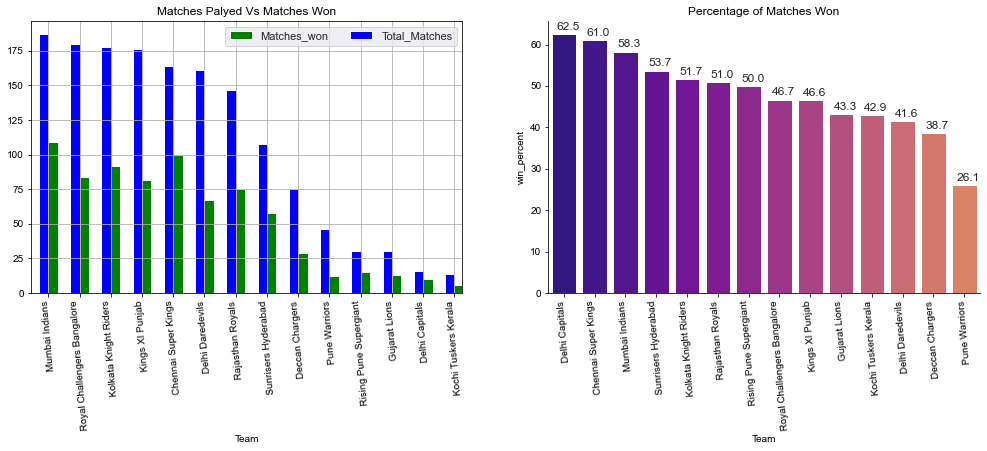

In [24]:
fig, ax =plt.subplots(1,2,figsize=(17,5))
sns.set()
df = win_data.set_index('Team')
width=0.3
df.Matches_won.plot(kind='bar',color='green',ax=ax[0],width=width, position=0)
df.Total_Matches.plot(kind='bar',color='blue',width = width,position=1,ax=ax[0])
ax[0].legend(ncol = 2, loc = 'upper right')
sns.barplot(y='win_percent',x='Team',data=win_data[['Team','win_percent']].sort_values(by='win_percent',ascending=False)
                 ,palette=sns.color_palette('plasma',20),ax=ax[1])
ax[0].tick_params('x', labelrotation=95)
ax[1].tick_params('x', labelrotation=95)
ax[0].set_title('Matches Palyed Vs Matches Won')
ax[1].set_title('Percentage of Matches Won')
annot_plot(ax[1],0.15,1)
plt.show()

* Out of total matches played Delhi capitals has highest winning percentage , though Mumbai Indians has played most matches and won most matches.

# Most hosted Venues

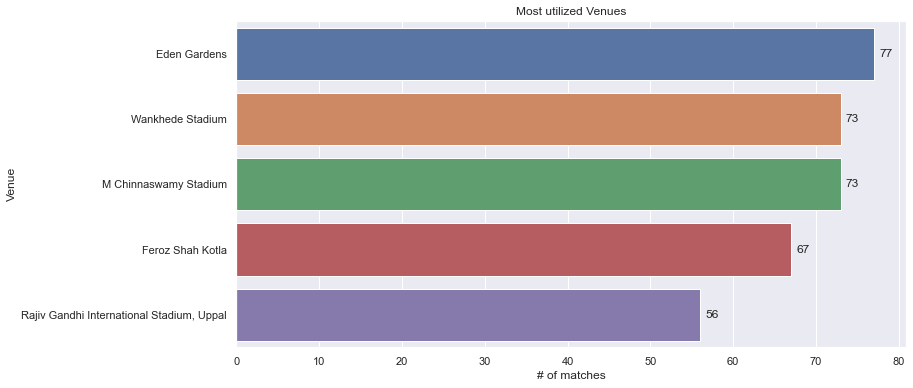

In [25]:
plt.figure(figsize=(12,6))
plt.title('Most utilized Venues')
ax=sns.countplot(y=matches['venue'],order = matches['venue'].value_counts()[0:5].index)
ax.set_xlabel('# of matches')
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
ax.set_ylabel('Venue')
plt.show()

 * Eden Gardens are the most frequently hosted stadium .

## Toss Winning VS Winning Chances

In [26]:
teams_toss = pd.concat([matches.team1,matches.team2])
teams_toss = teams_toss.value_counts().reset_index()
teams_toss.columns = ['Team','Total_Matches']
toss_won = matches.toss_winner.value_counts().reset_index()
toss_won.columns = ['Team','toss_won']
toss_data= toss_won[['Team','toss_won']].merge(teams_toss, left_on = 'Team', right_on = 'Team', how = 'right')
toss_data['toss_win_%'] =  round((toss_data.toss_won/toss_data['Total_Matches'])*100,2)
temp = matches[matches.toss_winner== matches.winner]
temp = temp.winner.value_counts().reset_index()
temp.columns=['Team','match_wins']
toss_data= temp[['Team','match_wins']].merge(toss_data, left_on = 'Team', right_on = 'Team', how = 'right')
toss_data['match_win_percent'] = round((toss_data.match_wins/toss_data['toss_won'])*100,1)

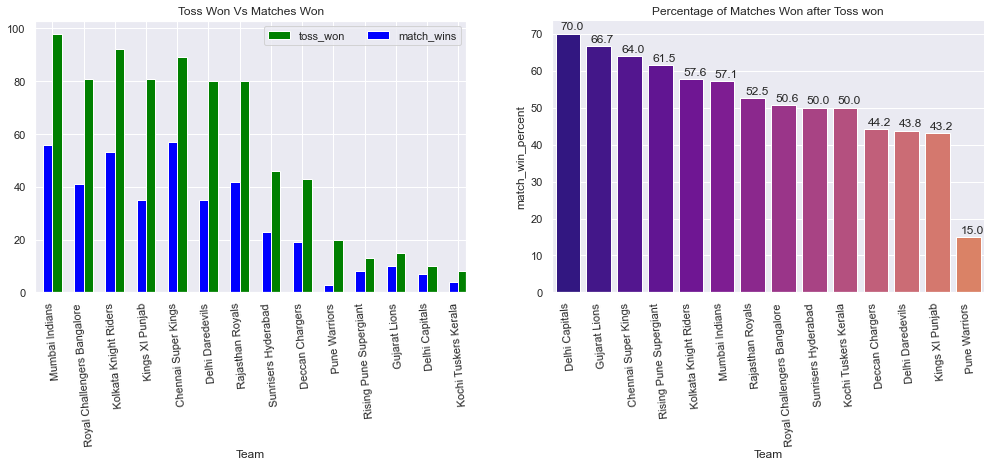

In [27]:
fig, ax =plt.subplots(1,2,figsize=(17,5))
sns.set()
df = toss_data.set_index('Team')
width=0.3
df.toss_won.plot(kind='bar',color='green',ax=ax[0],width=width, position=0)
df.match_wins.plot(kind='bar',color='blue',width = width,position=1,ax=ax[0])
ax[0].legend(ncol = 2, loc = 'upper right')
sns.barplot(y='match_win_percent',x='Team',data=toss_data[['Team','match_win_percent']].sort_values(by='match_win_percent',ascending=False)
                 ,palette=sns.color_palette('plasma',20),ax=ax[1])
ax[0].tick_params('x', labelrotation=95)
ax[1].tick_params('x', labelrotation=95)
ax[0].set_title('Toss Won Vs Matches Won')
ax[1].set_title('Percentage of Matches Won after Toss won')
annot_plot(ax[1],0.15,1)
plt.show()

* Mumbai Indians has won most of the times but their chance of winning match after winning toss is 57.1% only.

## Totals Runs in Seasons

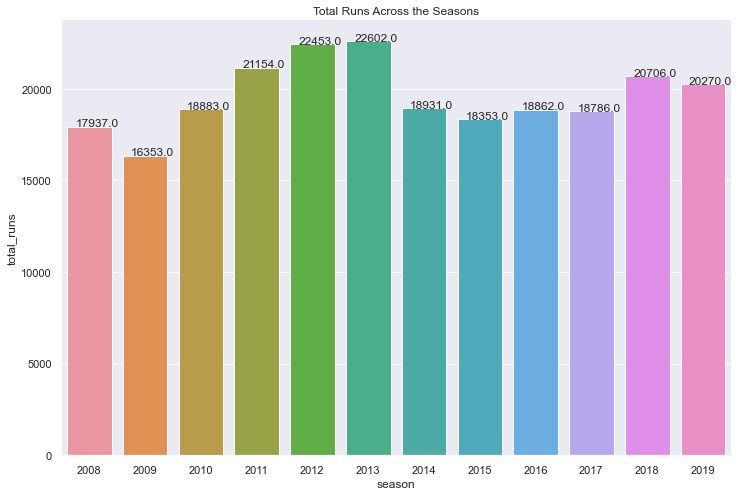

In [28]:
delivery_metrics= matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season_total_runs=delivery_metrics.groupby(['season'])['total_runs'].sum().reset_index()
plt.figure(figsize=(12,8))
ax=sns.barplot(x='season', y='total_runs',data=season_total_runs)
annot_plot(ax,0.15,1)
plt.title('Total Runs Across the Seasons')
plt.show()

* In 2013 the number of total runs is more compared to 2012,2011 or the other years , as there were more number of matches were conducted than usual.

## Average Runs per match Across the Seasons

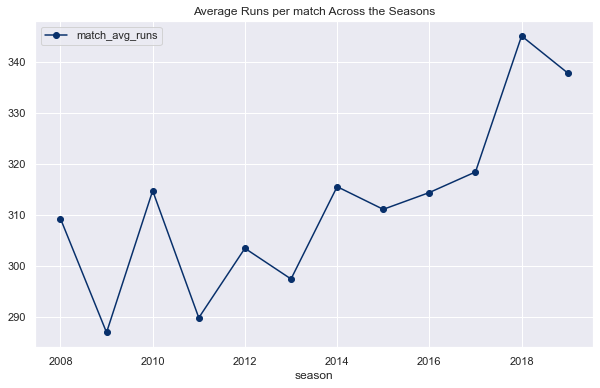

In [29]:
temp = delivery_metrics.groupby(['season','match_id'])['total_runs'].sum().reset_index()
temp.columns = ['season','match_id','match_avg_runs']
temp = temp.groupby('season')['match_avg_runs'].mean().reset_index()
cm = plt.cm.get_cmap('hot')
temp.set_index('season').plot(marker='o',colormap='Blues_r')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match Across the Seasons')
plt.show()

* In 2018 the average run per match are very high than usual

## Run Rate

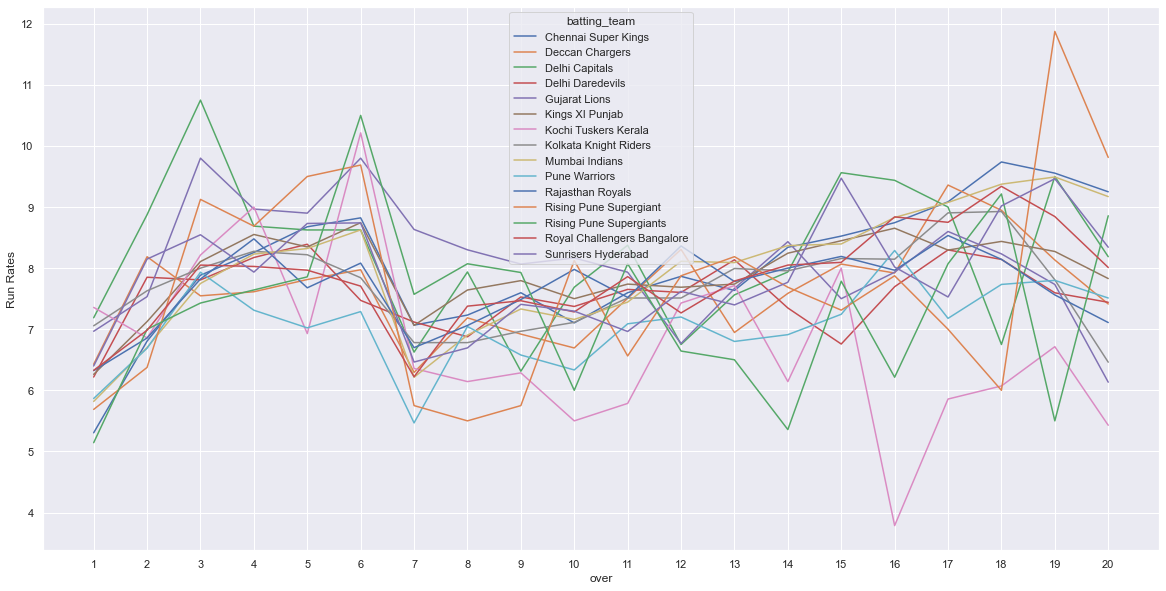

In [36]:
matches_team = delivery_metrics.groupby('batting_team')['match_id'].nunique().reset_index()
runperover = delivery_metrics.groupby(['batting_team','over'])['total_runs'].sum().reset_index()
runperover=runperover.merge(matches_team,left_on='batting_team',right_on='batting_team',how='outer')
runperover['run_rate'] = runperover.total_runs/runperover.match_id
run_per_over = runperover[['batting_team','over','run_rate']].set_index(['batting_team','over'])
r = run_per_over.unstack(level=0)
team = matches_team.batting_team
r.run_rate[team].plot() #plotting graphs for teams that have played more than 100 matches
x=r.index
plt.xticks(x)
plt.ylabel('Run Rates')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

* The Run rate at the starting over like 2nd and 3rd over is usually higher and goes on decresing trend till 20 overs

## Top Wicket Taker

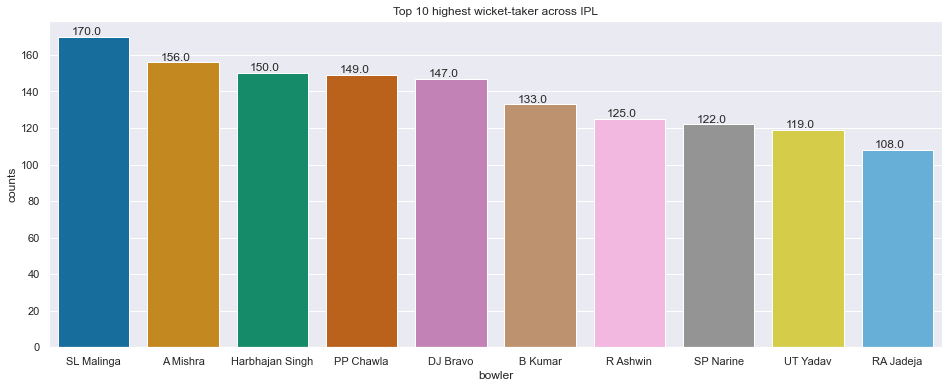

In [37]:
high_wickettaker_all = delivery_metrics[delivery_metrics.player_dismissed != 0]

high_wickettaker_all = high_wickettaker_all[(high_wickettaker_all.dismissal_kind !='retired hurt') & (high_wickettaker_all.dismissal_kind !='obstructing the field'
) & (high_wickettaker_all.dismissal_kind !='run out') ]
high_wickettaker = high_wickettaker_all.bowler.value_counts().reset_index()
high_wickettaker = pd.DataFrame(high_wickettaker)
high_wickettaker.columns = ['bowler','counts']
high_wickettaker = high_wickettaker.sort_values(by='counts',ascending=False)
plt.subplots(figsize=(16,6))
plt.title('Top 10 highest wicket-taker across IPL')
ax = sns.barplot(y='counts',x='bowler',data=high_wickettaker[:10],palette=sns.color_palette('colorblind',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

* SL Malinga is the highest wicket taker from 2008 to 2018 with 170 wickets.

## Purple Cap

In [38]:
def purple_cap(season):
        purple_cap = high_wickettaker_all[high_wickettaker_all.season==season]
        purple_cap = purple_cap.bowler.value_counts().reset_index()
        purple_cap.columns = ['bowler','wicket']
      #purple_cap.head(5)
        plt.subplots(figsize=(16,4))
        plt.title('Top 5 PURPLE CAP contendors in IPL-'+str(season))
        values = purple_cap.wicket[:5]
        print(str(list(purple_cap.bowler[:1]))+' won the PURPLE CAP in IPL- ',str(season))
        clrs = ['grey' if (x < max(values)) else 'purple' for x in values ]
        ax=sns.barplot(x='bowler', y='wicket',data=purple_cap[:5], palette=clrs) # color=clrs)
        for p in ax.patches:
            ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
        plt.show()

['DJ Bravo'] won the PURPLE CAP in IPL-  2013


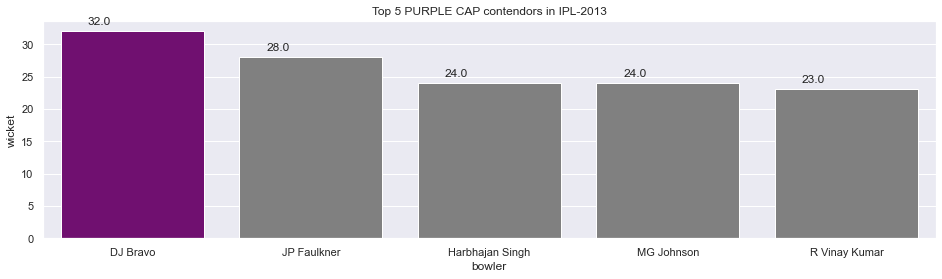

In [40]:
purple_cap(2013)          #this gives you purple cap holder according to year

## Orange Cap

In [41]:
def orange_cap(season):
    orange_cap = delivery_metrics[delivery_metrics.season==season]
    orange_cap = orange_cap.batsman.value_counts().reset_index()
    orange_cap.columns = ['batsman','runs']
    #print(orange_cap.head(5))
    plt.subplots(figsize=(16,4))
    plt.title('Top 5 ORANGE CAP contendors in IPL-'+str(season))
    values = orange_cap.runs[:5]
    print(str(str(orange_cap.batsman[:1].values))+' won the ORANGE CAP in IPL- ',season)
    clrs = ['grey' if (x < max(values)) else 'Orange' for x in values ]
    ax=sns.barplot(x='batsman', y='runs',data=orange_cap[:5], palette=clrs) # color=clrs)
    for p in ax.patches:
          ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    plt.show()

['LMP Simmons'] won the ORANGE CAP in IPL-  2015


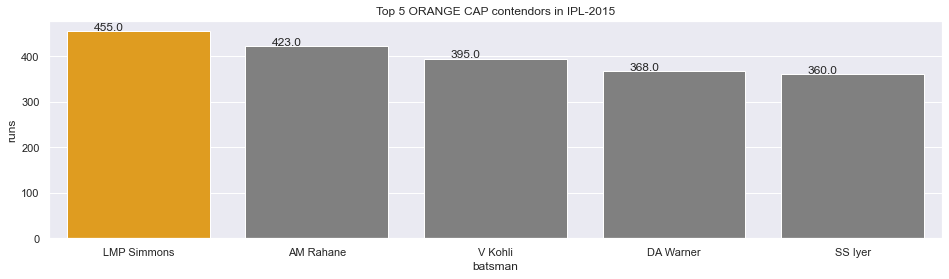

In [42]:
orange_cap(2015)                          #this gives you orange cap holder according to year

## BATSMAN-METRICS

In [48]:
innings = deliveries.groupby('batsman')['match_id'].nunique().reset_index()
bat=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
bat = innings.merge(bat,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(runs,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'match_id':'Innings','ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
bat['strike_rate']=np.round(bat['ball_y']/bat['ball_x']*100,2)
bat['bat_average'] = np.round((bat.ball_y/bat.Innings),2)
bat=bat.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman'])['batsman_runs'].max().reset_index()
bat=bat.merge(compare,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batsman_runs':'Highest_score'},axis=1,inplace=True)
batsman=bat[1:].sort_values('runs',ascending=False).head(10)
batsman.style.background_gradient(cmap="YlGn")

,batsman,Innings,balls,runs,strike_rate,bat_average,6's,4's,Highest_score
486,V Kohli,169,4211,5434,129.040000,32.150000,482,191,113
428,SK Raina,189,4044,5415,133.900000,28.650000,495,195,100
367,RG Sharma,182,3816,4914,128.770000,27.000000,431,194,109
112,DA Warner,126,3398,4741,139.520000,37.630000,459,181,126
392,S Dhawan,158,3776,4632,122.670000,29.320000,526,96,98
92,CH Gayle,124,3131,4560,145.640000,36.770000,376,327,175
290,MS Dhoni,170,3318,4477,134.930000,26.340000,297,207,89
384,RV Uthappa,170,3492,4446,127.320000,26.150000,436,156,87
26,AB de Villiers,142,2977,4428,148.740000,31.180000,357,214,133
147,G Gambhir,151,3524,4223,119.840000,27.970000,492,59,93


## Most Runs by batsman in IPL

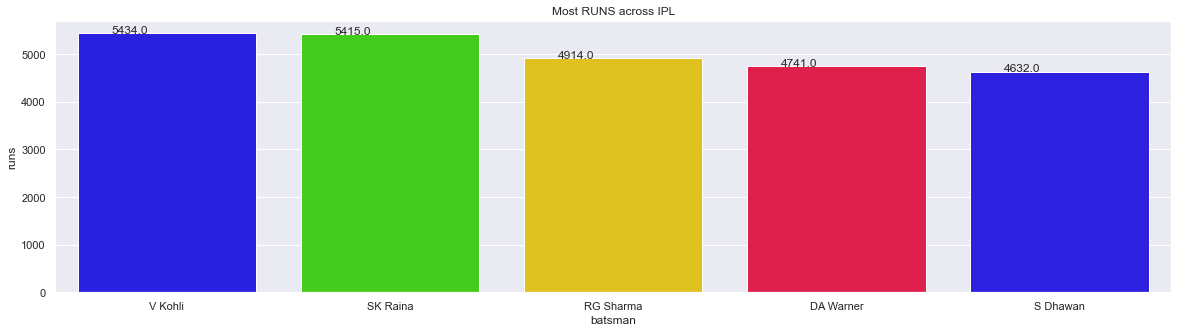

In [51]:
plt.subplots(figsize=(20,5))
plt.title("Most RUNS across IPL")
batsman = batsman.sort_values("runs",ascending=False)
ax = sns.barplot(y="runs",x='batsman',data=batsman[:5],palette=sns.color_palette('prism',5))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

## Most Sixes & Fours by batsman in IPL

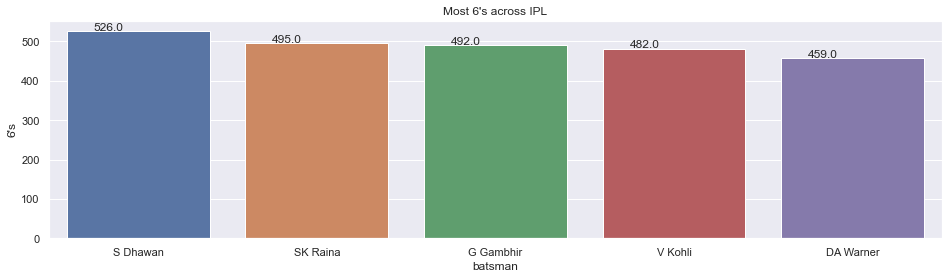

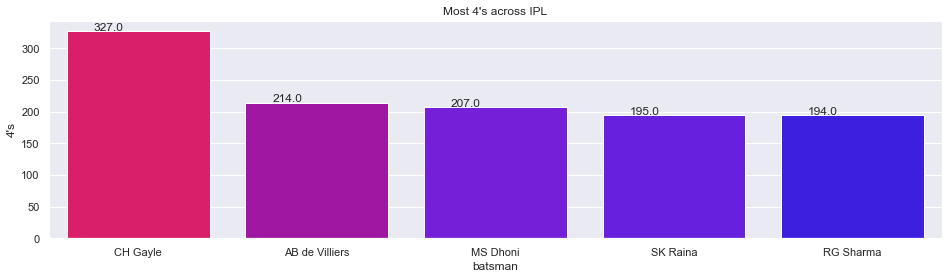

In [52]:
plt.subplots(figsize=(16,4))
plt.title("Most 6's across IPL")
batsman = batsman.sort_values("6's",ascending=False)
ax = sns.barplot(y="6's",x='batsman',data=batsman[:5])
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

plt.subplots(figsize=(16,4))
plt.title("Most 4's across IPL")
batsman = batsman.sort_values("4's",ascending=False)
ax = sns.barplot(y="4's",x='batsman',data=batsman[:5],palette=sns.color_palette('prism',10))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

* S Dhawan has highest number of 6's scored in all the IPL Matches & CH Gayle has highest number of 4's scored in all the IPL Matches.

## BOWLER METRICS

In [53]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
bbm = ct.groupby(['match_id','bowler'])['player_dismissed'].count().reset_index()
bbm = bbm.sort_values('player_dismissed',ascending=True)
#bbm
bowl_over = deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index()
bowl_over = bowl_over.sort_values('total_runs',ascending=False)
bowl_wicket_over = bbm.merge(bowl_over,left_on=['match_id','bowler'],right_on=['match_id','bowler'],how='outer')
bf = bowl_wicket_over.groupby(['bowler']).max().reset_index()
bf = bf[['bowler','player_dismissed','total_runs']]

bf['player_dismissed']=bf['player_dismissed'].fillna(0)
bf['player_dismissed']=bf['player_dismissed'].astype(int)
bf['bbm'] = bf[['player_dismissed', 'total_runs']].astype(str).apply(lambda x: ' / '.join(x), axis=1)
bf.replace('NaN', np.NaN)
bfs = bf[['bowler','bbm']]
four_wicket=bowl_wicket_over.groupby('bowler')['player_dismissed'].agg(lambda x: (x==4).sum()).reset_index()
four_wicket.columns = ['bowler','4W']
fifer = bowl_wicket_over.groupby('bowler')['player_dismissed'].agg(lambda x: (x>4).sum()).reset_index()
fifer.columns = ['bowler','5W']

In [54]:
innings = deliveries.groupby('bowler')['match_id'].nunique().reset_index()
balls=deliveries.groupby(['bowler'])['ball'].count().reset_index()
runs=deliveries.groupby(['bowler'])['total_runs'].sum().reset_index()
balls = innings.merge(balls,left_on='bowler',right_on='bowler',how='outer')
balls=balls.merge(runs,left_on='bowler',right_on='bowler',how='outer')
balls.rename({'match_id':'Innings','ball':'ball_x','total_runs':'runs_given'},axis=1,inplace=True)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
wickets = ct.groupby('bowler')['player_dismissed'].count().reset_index()
balls=balls.merge(wickets,left_on='bowler',right_on='bowler',how='outer')
balls['strike_rate']=np.round((balls.ball_x/balls.player_dismissed),2)
balls['average'] = np.round((balls.runs_given/balls.player_dismissed),2)
balls['economy']=np.round(balls['runs_given']/(balls['ball_x']/6),2)
balls=balls.merge(bfs,left_on='bowler',right_on='bowler',how='outer')
balls=balls.merge(four_wicket,left_on='bowler',right_on='bowler',how='outer')
balls=balls.merge(fifer,left_on='bowler',right_on='bowler',how='outer')
balls[['player_dismissed','strike_rate','average','4W','5W']]=balls[['player_dismissed','strike_rate','average','4W','5W']].fillna(0)
balls[['player_dismissed','4W','5W']]=balls[['player_dismissed','4W','5W']].astype(int)
balls.rename({'ball_x':'balls','player_dismissed':'wickets'},axis=1,inplace=True)
balls = balls.sort_values('wickets',ascending=False)
bowler=balls.head(10)
bowler.style.background_gradient(cmap='PRGn')

,bowler,Innings,balls,runs_given,wickets,strike_rate,average,economy,bbm,4W,5W
340,SL Malinga,122,2974,3511,170,17.490000,20.650000,7.080000,5 / 58,6,1
7,A Mishra,147,3172,3850,156,20.330000,24.680000,7.280000,5 / 56,3,1
126,Harbhajan Singh,157,3451,4050,150,23.010000,27.000000,7.040000,5 / 60,1,1
264,PP Chawla,156,3157,4153,149,21.190000,27.870000,7.890000,4 / 67,2,0
93,DJ Bravo,131,2711,3733,147,18.440000,25.390000,8.260000,4 / 56,2,0
53,B Kumar,117,2707,3264,133,20.350000,24.540000,7.230000,5 / 58,2,1
269,R Ashwin,136,3016,3391,125,24.130000,27.130000,6.750000,4 / 58,1,0
347,SP Narine,109,2600,2939,122,21.310000,24.090000,6.780000,5 / 48,6,1
381,UT Yadav,118,2605,3640,119,21.890000,30.590000,8.380000,4 / 65,2,0
282,RA Jadeja,142,2541,3221,108,23.530000,29.820000,7.610000,5 / 57,3,1


## Top Wicket takers in IPL

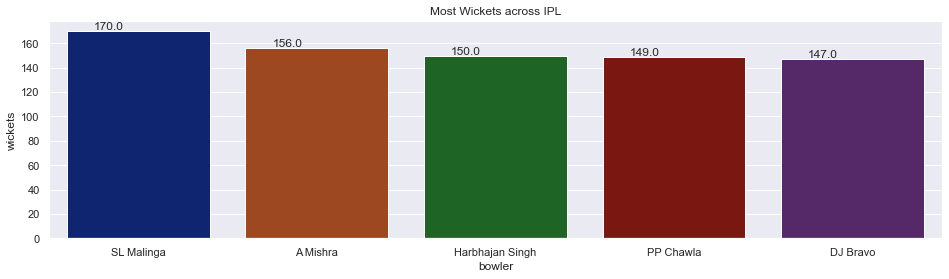

In [55]:
plt.subplots(figsize=(16,4))
plt.title("Most Wickets across IPL")
ax = sns.barplot(y="wickets",x='bowler',data=bowler[:5],palette=sns.color_palette('dark',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

* SL Malinga has taken 170 wickets all togther from 2008-2019 IPL matches

## Most Catches across IPL

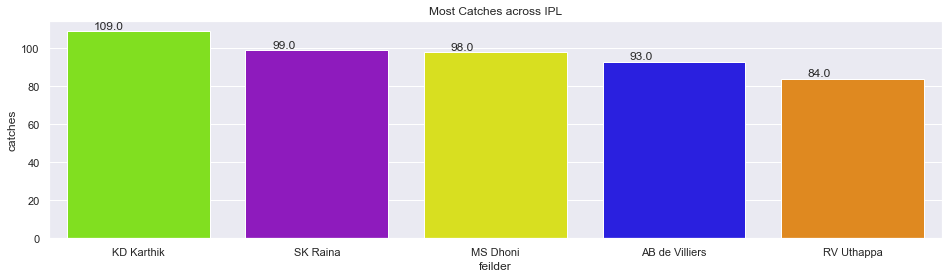

In [57]:
caught = deliveries[deliveries.dismissal_kind=='caught']
caught = caught.groupby('fielder')['bowler'].count().reset_index()
caught.columns = ['feilder','catches']
caught = caught.sort_values('catches',ascending=False)
plt.subplots(figsize=(16,4))
plt.title('Most Catches across IPL')
ax = sns.barplot(y='catches',x='feilder',data=caught[:5],palette=sns.color_palette('prism',23))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

* KD Karthik has taken most of wickets by 109 catches followed by SK Raina

## Most RunOuts by fielder across IPL

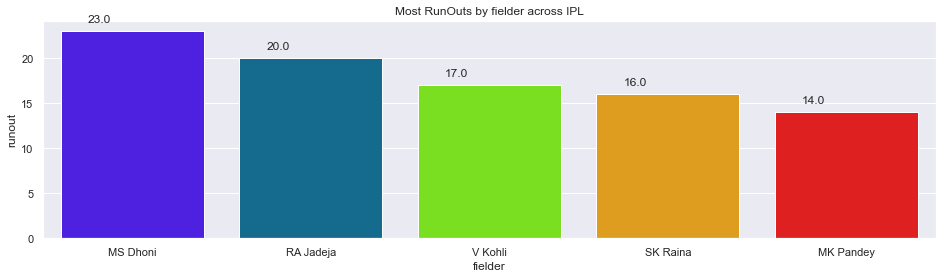

In [58]:
runouts = deliveries[deliveries.dismissal_kind=='run out']
runouts = runouts.groupby('fielder')['dismissal_kind'].count().reset_index()
runouts.columns = ['fielder','runout']
runouts = runouts.sort_values('runout',ascending=False)
plt.subplots(figsize=(16,4))
plt.title('Most RunOuts by fielder across IPL')
ax = sns.barplot(y='runout',x='fielder',data=runouts[:5],palette=sns.color_palette('prism',12))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

* MS Dhoni has tacken 23 wickets by run-out the batsman

# Observations

* The information depicted is of 9 seasons of IPL and a clear trend can be seen for the match winning combination of team members and the batting strengths.
* It was seen that Mumbai Indians played the most number of matches.
* Virat Kohli was the best batsman and has scored against some of the best bowlers
* The information shown for the opponents of Delhi Daredevils would include the bowlers against whom Virat performed poorly.
* The top batsmen have been consistent in their performance.
* Mumbai Indians have needed more games for each win while teams like CSK have needed less to win.